In [16]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/the/*.bmp'):
  n = cv2.imread(imgpath)

  if dem%10 == 0:
    x_test.append(n)
    y_test.append(0)
  else:
    x_train.append(n)
    y_train.append(0)
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)
# y_train, y_test chỉ được đánh số từ 0 cho các đối tượng (output): VD a Trực đánh số 0, a Hiếu số 1, tao số 2

y_test = np.array(y_test)
y_train = list(y_train)

In [17]:
print(y_train)
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0


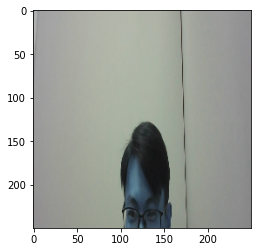

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_test[23])
print(y_test[23])

In [23]:
print(x_train.shape)
#print(y_train.shape)
print(y_test.shape)
print(x_test.shape)


(207, 250, 250, 3)
(24,)
(24, 250, 250, 3)


In [24]:
a = np.array([[1], [2], [3], [4]])
print(a)
m = np.delete(a, 2)
print(m)
a = list(a)
print(a)

[[1]
 [2]
 [3]
 [4]]
[1 2 4]
[array([1]), array([2]), array([3]), array([4])]


In [25]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(207, 187500)
x_test = x_test.reshape(24, 187500)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 3) với 3: số phần tử output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(187500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Không cần Dropout cũng đc :D?
model.add(Dense(1, activation='softmax')) 
# model.summary()

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_test, y_test))  # verbose = 0: trong qua trinh hoc ko hien thi ra man hinh, = 1: hien thi ..., = 2: hien thi 1/500:..., 2/500:...

Epoch 1/20
4/4 [==============================] - 4s 203ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 108ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 107ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 109ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 110ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

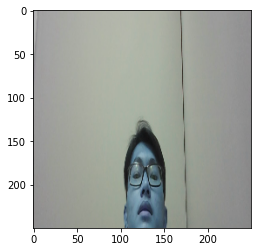

In [28]:
import cv2
img = cv2.imread(r'the_0019.jpg')
plt.imshow(img)

(250, 250, 3)


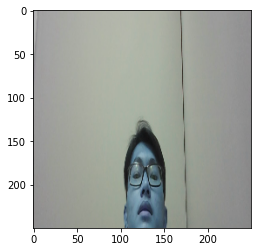

In [29]:
img_re = cv2.resize(img, (250, 250))
plt.imshow(img_re)
print(img_re.shape)

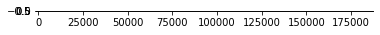

In [30]:
x_test_c = img_re.reshape(-1, 187500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

In [31]:
y_pred = model.predict(x_test_c)
# print(y_test)
# acc_num_class0 = y_pred[0]
# acc_num_class1 = y_pred[1]
# np.max
print(y_pred)

[[1.]]


In [32]:
y_pred = model.predict(x_test_c)
print(y_pred)

[[1.]]


In [33]:
score = model.evaluate(x_test_c, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0
